# The Individual Plan #    
## Imoprting data ##



https://github.com/Timzhou246/DSCI-100-Individual-plan.git

In [13]:
library(tidyverse)
url = 'https://drive.google.com/uc?export=download&id=1ctzqbDiZSMFGfIHzhQysNYrfjJvPOcl8'
players <- read_csv(url)
dim(players); head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [14]:
distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


## Data Discription ##  
There are 199 observations and 9 variables, the variables are:  
+ `experience`: charactor, describe the experience level of the player.    
+ `subscibe`: logical, shows whether player has subscribe the game info. "ture" shows player has subscribe; "fasle" shows player has not subscribe.   
+ `hashedEmail`: charactor, represents each player's email address, it's used for private protection.  
+ `played_hours`: double, shows how many hours has player played in total.  
+ `name`: charactor, shows the username of each player.  
+ `gender`: charactor, indicates the gender identity of players. Value includes Male, Female, Non-binary, Prefer not to say, Agender, Two-Spirited, and Other.  
+ `age`: double, represents the age of each individual player.  

### Potential issues ###  

1. There are some missing data in the variables. For example, the age variable has missing values (N/A) for some players. This may lead to biased results when performing statistical analyses.  
2. For the gender part, the quantities of  "Agender", "Other" are too small compare to "male" and "female". It might effect the result of visualization. We could combine data which is not "male", "female" together into form "other" group to make data more easier to interpret.  
3. There might be some invalid numeric values in the dataset. For example, played_hours could contain zero or extremely large numbers, which are unrealistic and may distort summary statistics.  

## Data Visualization ##

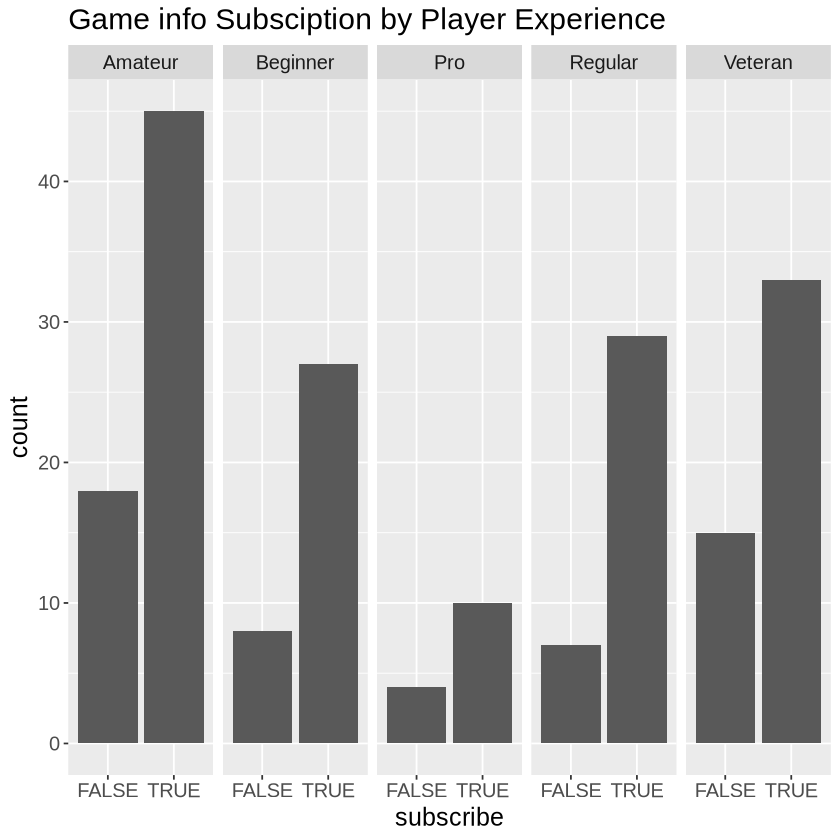

In [15]:
ggplot(players, aes(x = subscribe)) + 
geom_bar() + 
facet_grid(cols = vars(experience)) +
ggtitle("Game info Subsciption by Player Experience") +
theme(text = element_text(size = 15))

From this diagram, we find that at all experience levels, subscribe=TRUE counts are greater than subscribe=FALSE ones. Besides, the distribution of subscribe status varies across experience levels (e.g Amateur and Veteran have far more TRUE subscribers than Pro). Therefore, there is a relationship between subscribe and experience.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


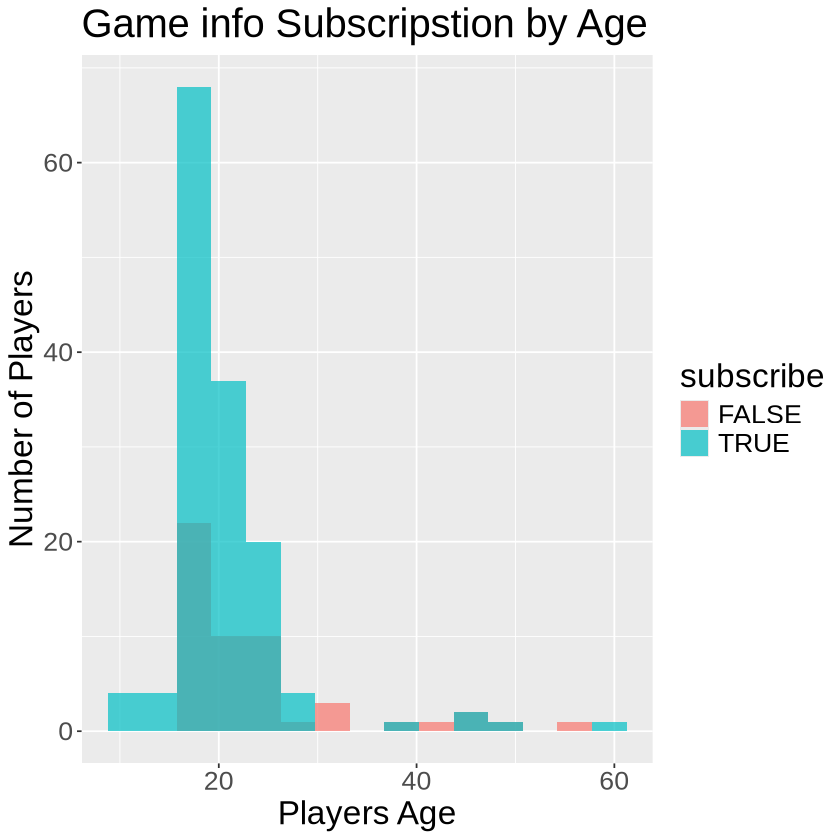

In [16]:
ggplot(players, aes(x = Age, fill = subscribe)) +
geom_histogram(alpha = 0.7, position = "identity", bins = 15) +
labs(x = "Players Age", y = "Number of Players", title = "Game info Subscripstion by Age") +
theme(text = element_text(size = 20))

From this diagram, we find subscribe=TRUE is more than FALSE. Besides, subscribers are mostly near age 20, showing players of this age are more willing to subscribe to game info. Thus, there is a relationship between Age and subscribe.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


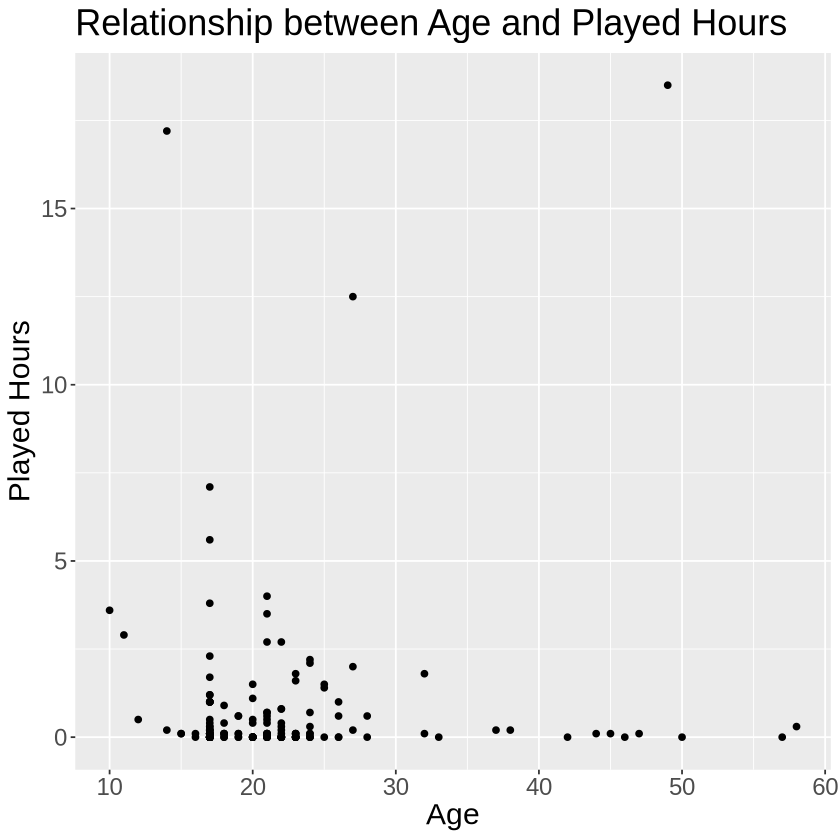

In [17]:
players |>  filter(played_hours <= 20) |>
ggplot(aes(x = Age, y = played_hours)) +
  geom_point() +
  labs(x = 'Age', y = 'Played Hours', title = 'Relationship between Age and Played Hours') +
  theme(text = element_text(size = 18))

From this diagram, the points are mainly concentrated in the age range of 10 to 30 with played hours less than 5. The points seem to be randomly distributed, and there is no clear relationship between age and played hours.

## Question Selected ##  
I will answer **question 2**: `We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.`  
In particular, I will use `experience`, `gender`, and `age` as perdictors to predict `played_hours`.  
This is a **regression** problem, as the response varibale `played_hours` is numerical. Also, I need to convert `experience` and `gender` into numerical before perform regression.  
There are two ways I can think of to process experience, and each has its own advantages and limitations.  
**one-hot encoding** can convert `experence` into 5 columns: `Pro`, `Veteran`, `Amateur`, `Regular`, and `Beginner`, each with values 0 and 1. the limitation is it increases dimensionality, making the data sparse, consuming more memory.  
**ordinary encoding** keeps `experience` as one column, and assign values to it context as: `pro`=5, `Veteran`=4, `Amateur`=3, `Regular`=2, `Beginner`=1. the limitation is it artificially sets an order and magnitude, which may not accurately reflect the real differences between categories and can mislead models relying on numerical relationships.  
I will perform both **KNN** regression and **linear** regression.  
For kNN regression, I will first use cross - validation and tuning k to choose the best k value. Cross - validation helps in estimating how well the model will generalize to new data. After determining the best k value and applying it to the training set, I will use the testing set to calculate the error such as mean squared error or root mean squared error.  
After all, I will compare the errors of both models to determine which one performs better and describe what might be done to improve it.  
I will split the data into training and testing sets. 75% for training, 25% for testing.  